# Project Work
# CMSE 202 final project
## Group 0

## <p style="text-align: right;"> &#9989; Jose, Narayana, Max, Insaan

## Imports and reading in the data
---

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [2]:
housing = pd.read_csv("realtor-data.zip.csv", delimiter = ',')
housing = housing.dropna()
housing

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


## 1. Plot of Housing Prices vs area of houses

---

In [3]:
#Splitting houses sold and houses still for sale
sold_houses = housing[housing["status"] == "sold"]
for_sale_houses = housing[housing["status"] == "for_sale"]

In [4]:
#Getting Michigan houses
MI = housing[housing["state"] == "Michigan"]
OH = housing[housing["state"] == "Ohio"]
MA = housing[housing["state"] == "Massachusetts"]

In [41]:
x = MI["price"]
y = MI["house_size"]
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()
print("Regression Results for Michigan Houses")
print(results.summary())

Regression Results for Michigan Houses
                            OLS Regression Results                            
Dep. Variable:             house_size   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 1.155e+04
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:55:40   Log-Likelihood:            -1.1990e+05
No. Observations:               14806   AIC:                         2.398e+05
Df Residuals:                   14804   BIC:                         2.398e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1

In [27]:
#Splitting Michigan houses into just East Lansing homes
EL = MI[MI["city"] == "East Lansing"]

#Splitting East Lansing Homes by houses for sale and old
EL_sale = EL[EL["status"] == "for_sale"]
print(f"There are {len(EL)} homes in East Lansing within this dataset.")

There are 150 homes in East Lansing within this dataset.


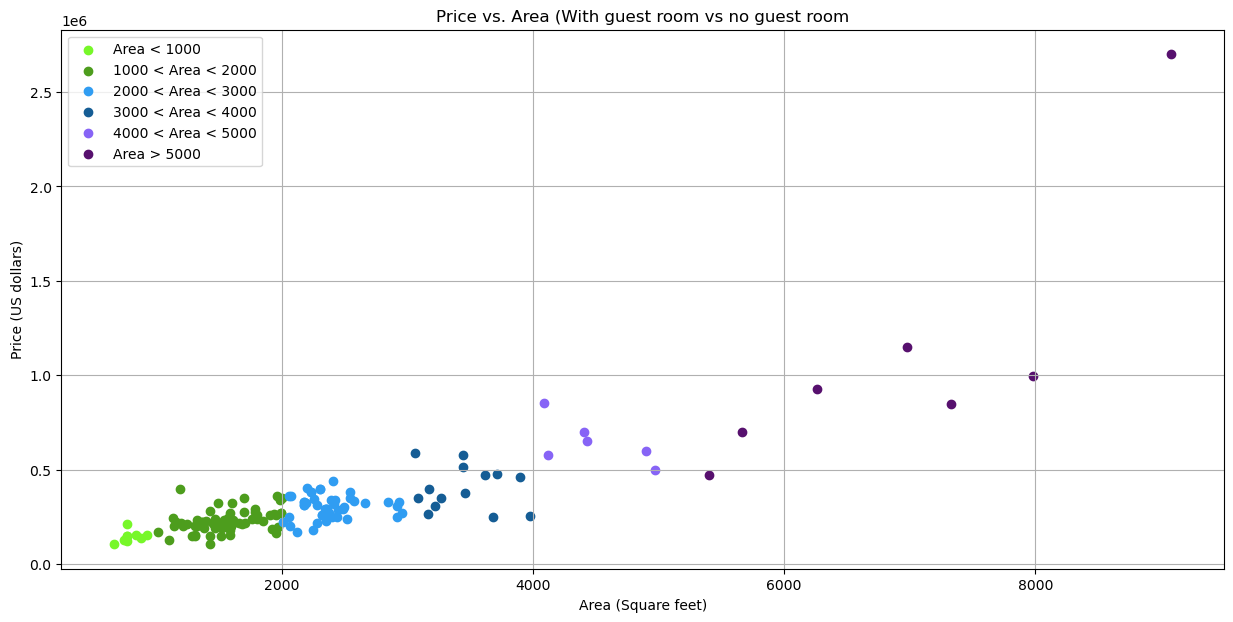

In [56]:
EL_1000 = EL[EL["house_size"] <= 1000]
EL_2000 = EL[EL["house_size"] <= 2000]
EL_2000 = EL_2000[EL_2000["house_size"] > 1000]
EL_3000 = EL.loc[(EL["house_size"] > 2000) & (EL["house_size"] <= 3000)]
EL_4000 = EL.loc[(EL["house_size"] > 3000) & (EL["house_size"] <= 4000)]
EL_5000 = EL.loc[(EL["house_size"] > 4000) & (EL["house_size"] <= 5000)]
EL_6000 = EL[EL["house_size"] > 5000]

plt.figure(figsize=(15, 7))
plt.scatter(EL_1000["house_size"], EL_1000["price"], c='#77F729', alpha=1, label = "Area < 1000")
plt.scatter(EL_2000["house_size"], EL_2000["price"], c='#4D9D1D', alpha=1, label = "1000 < Area < 2000")
plt.scatter(EL_3000["house_size"], EL_3000["price"], c='#309DF2', alpha=1, label = "2000 < Area < 3000")
plt.scatter(EL_4000["house_size"], EL_4000["price"], c='#155D95', alpha=1, label = "3000 < Area < 4000")
plt.scatter(EL_5000["house_size"], EL_5000["price"], c='#8764F6', alpha=1, label = "4000 < Area < 5000")
plt.scatter(EL_6000["house_size"], EL_6000["price"], c='#57106E', alpha=1, label = "Area > 5000")
plt.title('Price vs. Area (With guest room vs no guest room')
plt.xlabel('Area (Square feet)')
plt.ylabel('Price (US dollars)')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
X = EL_sale.drop(["brokered_by", "status", "price", "street", "city", "state", "zip_code", "city", "prev_sold_date"], axis = 1)
Y = EL_sale["price"]
    
X = sm.add_constant(X)

multi_model = sm.OLS(Y, X).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     235.6
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           1.06e-27
Time:                        23:34:26   Log-Likelihood:                -584.59
No. Observations:                  46   AIC:                             1179.
Df Residuals:                      41   BIC:                             1188.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.558e+04   5.09e+04      1.092      0.2

Making diagnostics plots for each of the main features within the regression model


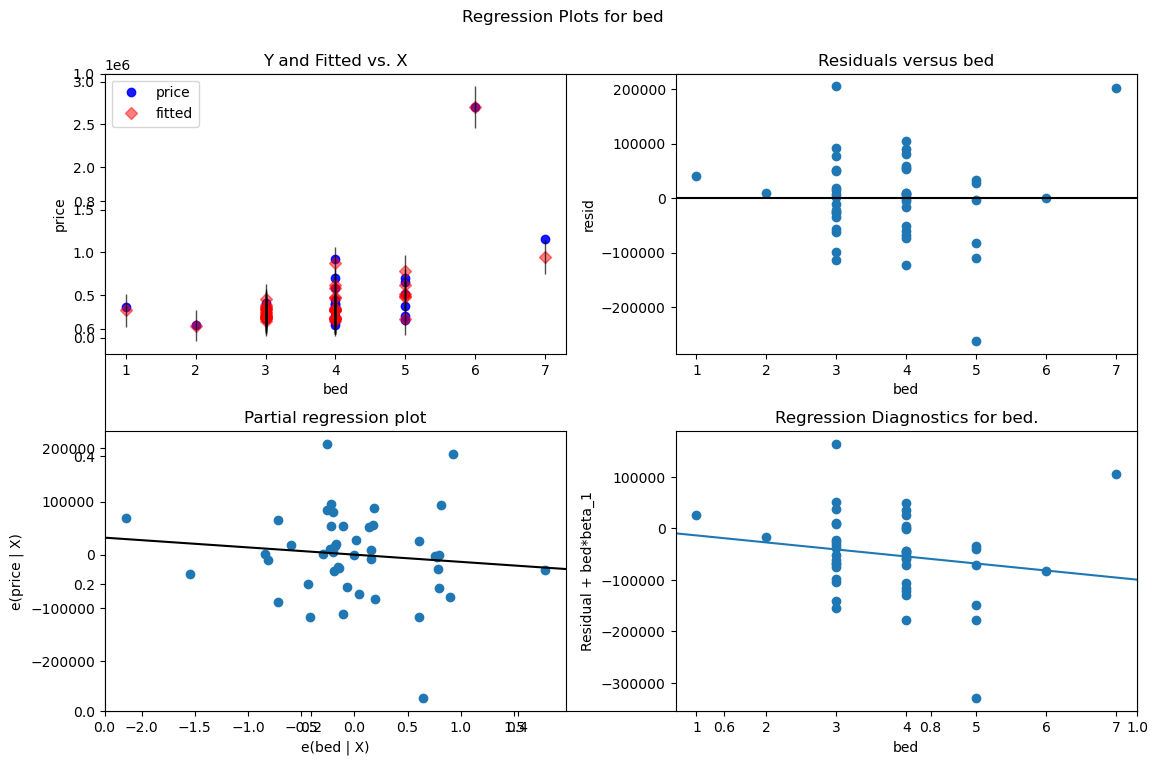

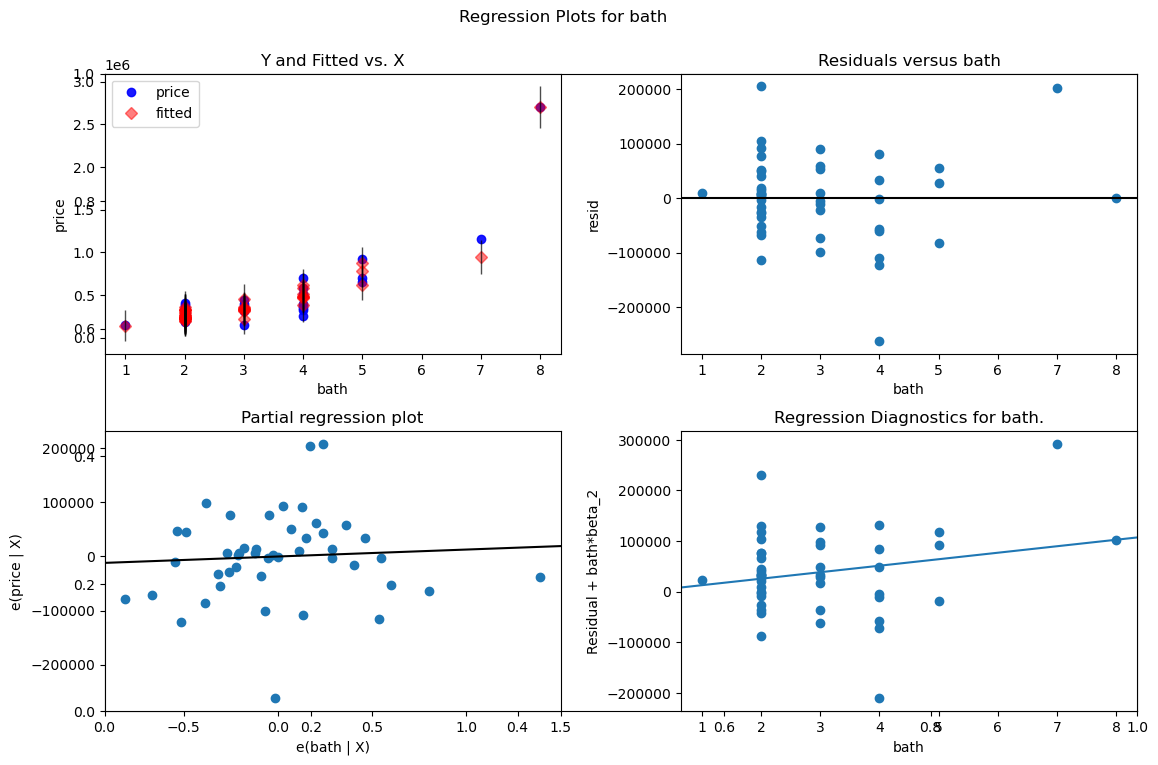

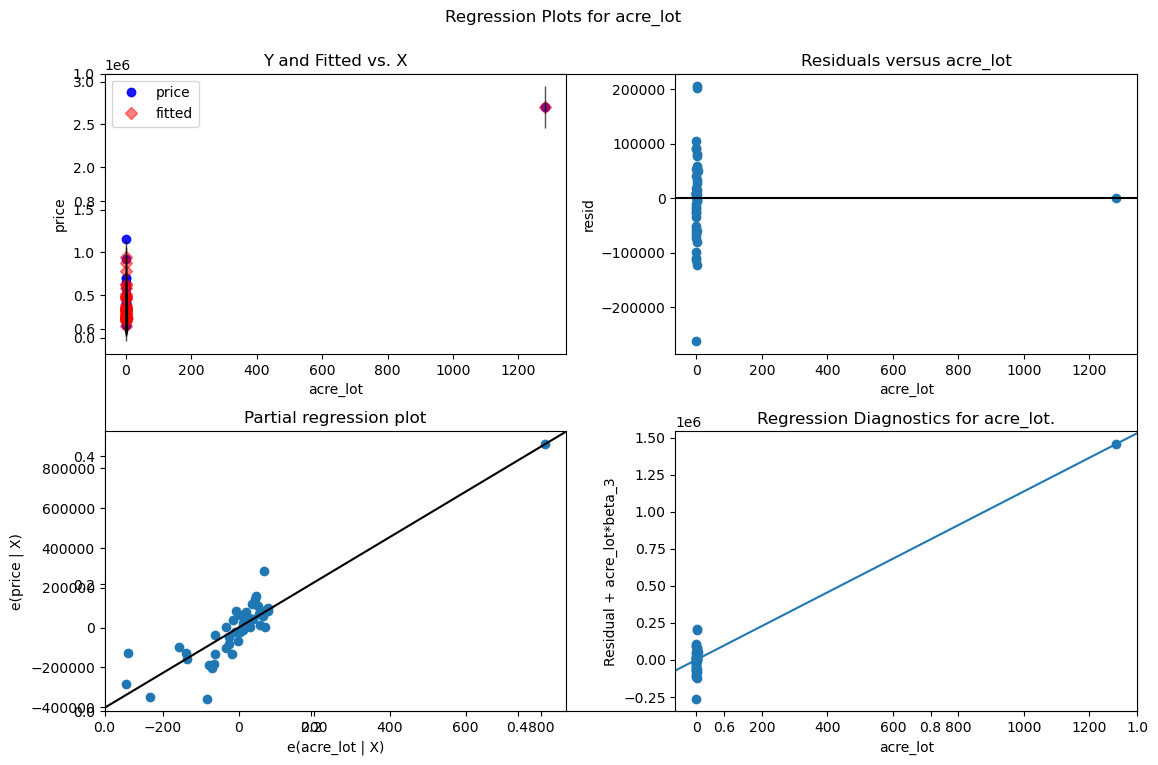

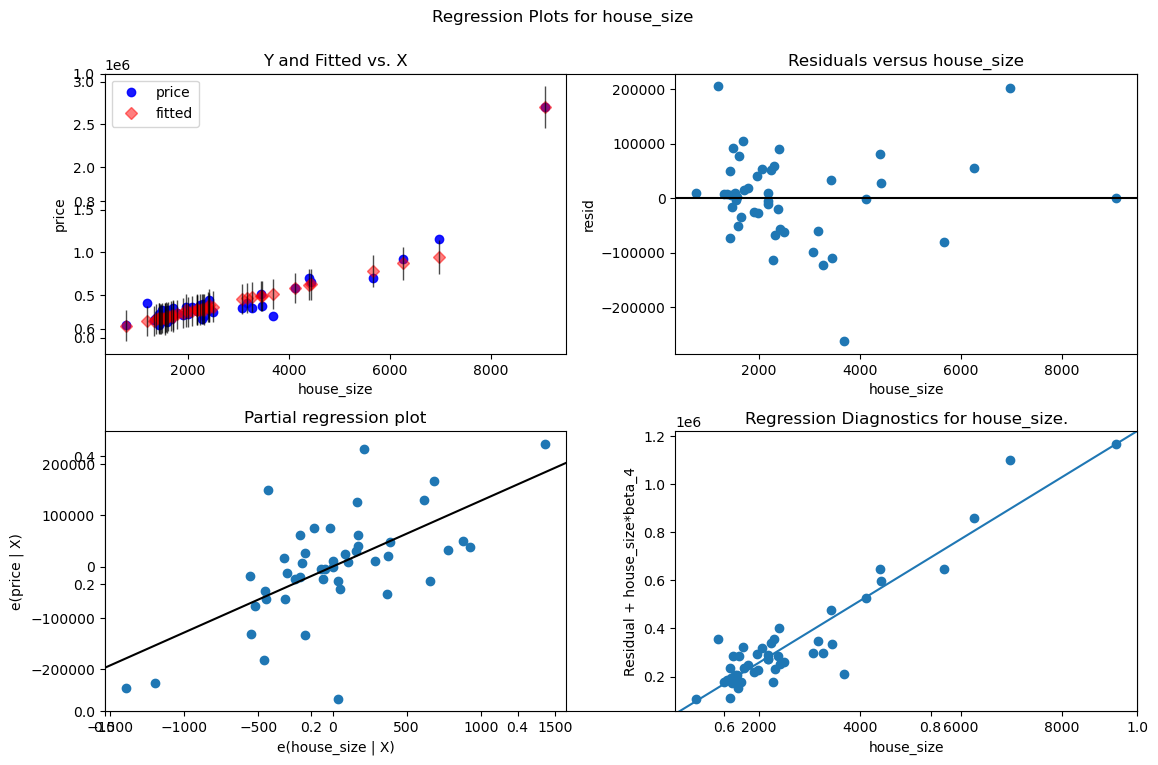

In [33]:
print("Making diagnostics plots for each of the main features within the regression model")
for feature in ['bed', 'bath', 'acre_lot', 'house_size']:
    fig, ax = plt.subplots(figsize=(12, 8))
    sm.graphics.plot_regress_exog(multi_model, feature, fig=fig)
    plt.title(f'Regression Diagnostics for {feature}.')
    plt.show()

## 2. Correlation of all features within East Lansing

---

<Figure size 400x400 with 0 Axes>

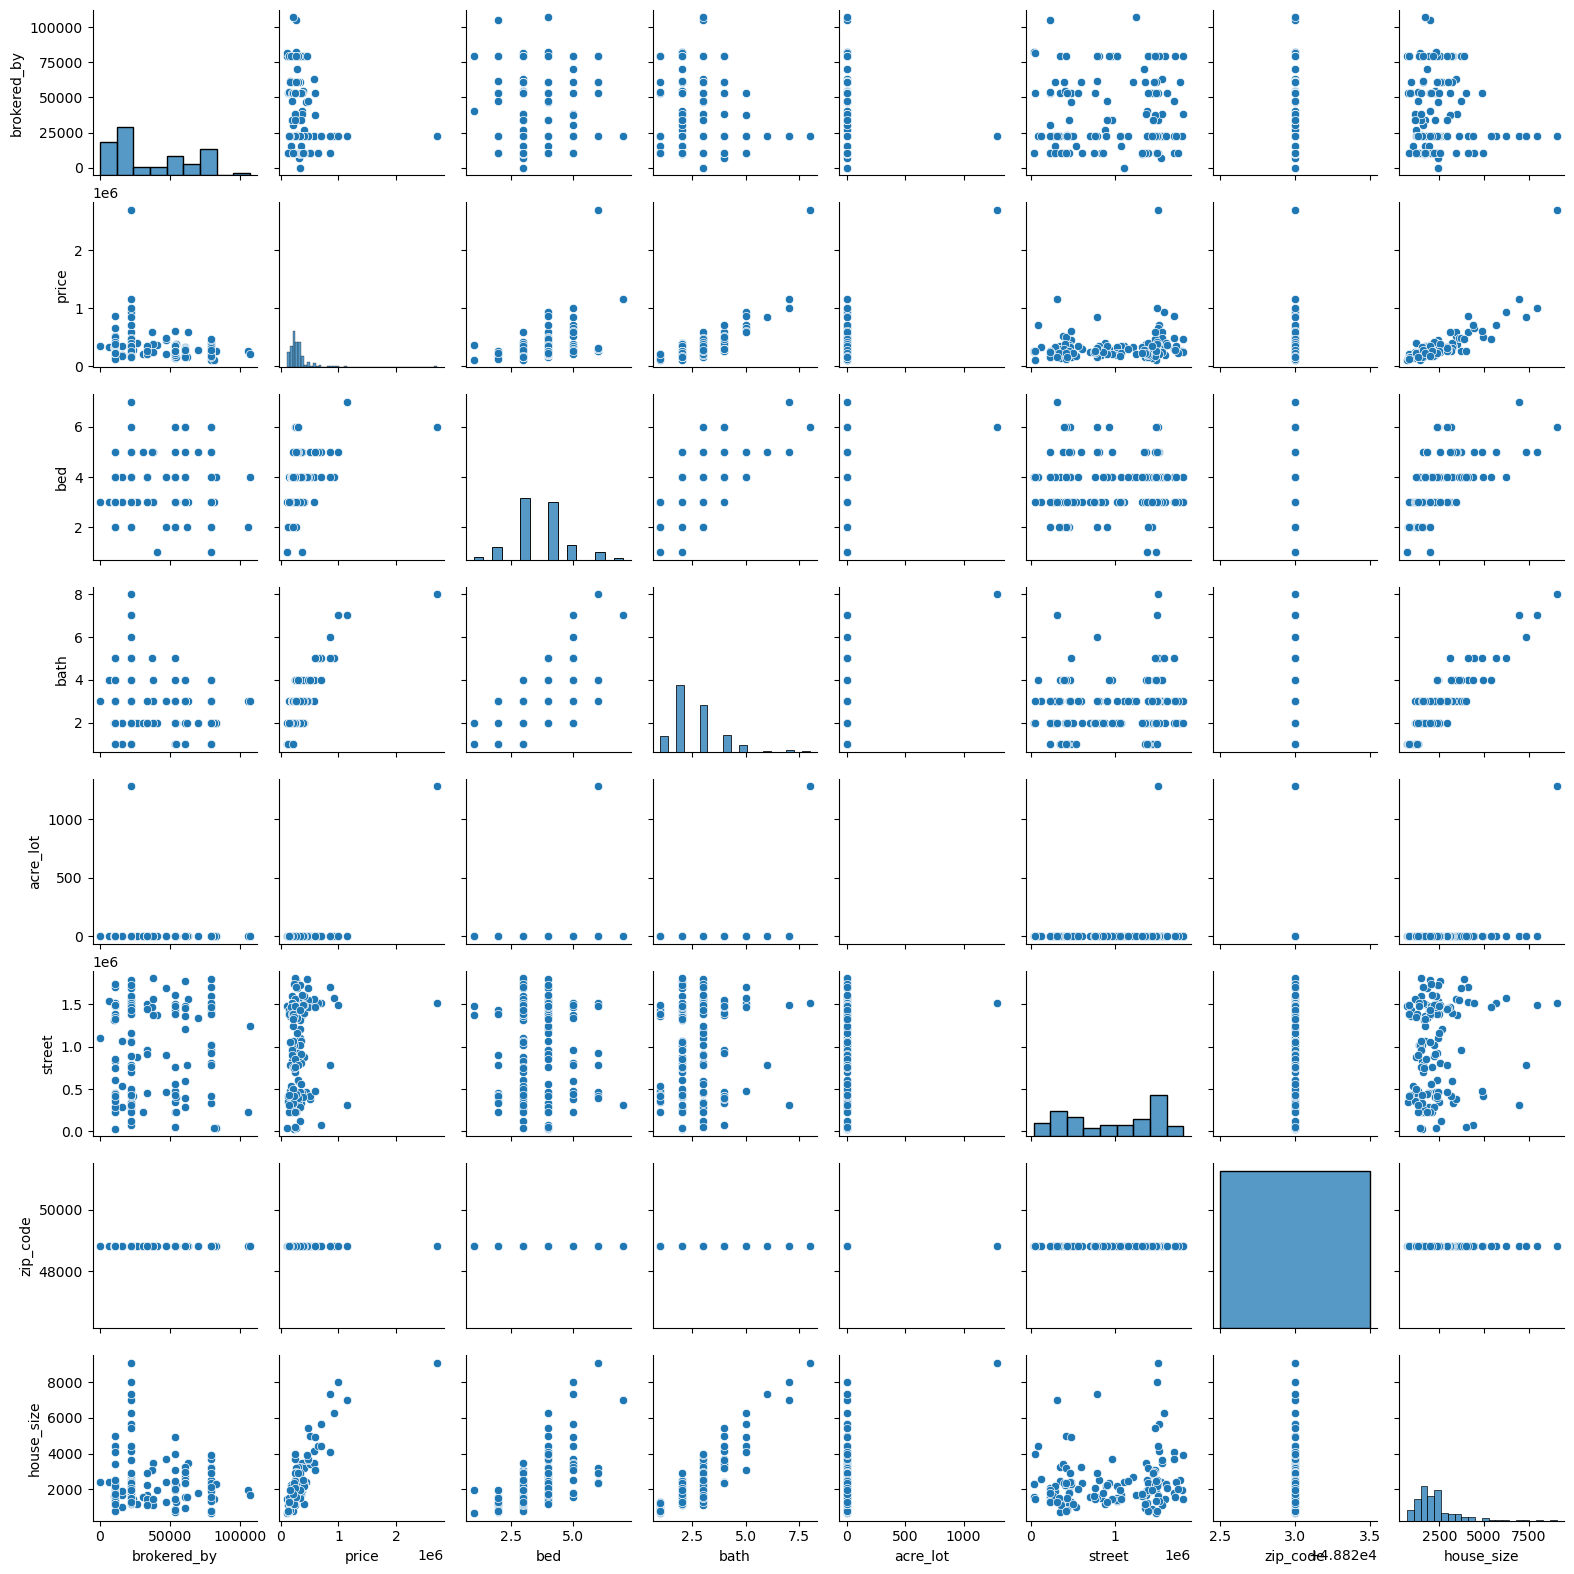

In [21]:
plt.figure(figsize=(4,4))
sns.pairplot(EL, diag_kind="hist", height=2)
plt.show()

## 3. Logistic Regression Model. 

---

In [62]:
X = EL_sale.drop(["brokered_by", "status", "price", "street", "city", "state", "zip_code", "city", "prev_sold_date"], axis = 1)
Y = EL_sale["price"]
train_vectors, test_vectors, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 50)

train_vectors_with_const = sm.add_constant(train_vectors)
logit_model = sm.Logit(train_labels, train_vectors_with_const)
result = logit_model.fit()

print(result.summary())

ValueError: endog must be in the unit interval.

In [63]:
print(train_labels)

750724     219900.0
750563     349900.0
750636     199900.0
750537     925000.0
750641     349900.0
750595     329900.0
747903     579900.0
749159     439900.0
750174     259900.0
750579     210000.0
750560     699900.0
750743     514900.0
750570     325000.0
750680     220000.0
750607     374900.0
750597     379900.0
750605     315000.0
750606     257500.0
748751     279000.0
750534     180000.0
750690     269900.0
749109     319900.0
750627     394900.0
748623     698900.0
748867     649900.0
750585     220000.0
750682     289000.0
750677     359900.0
749064     340000.0
748857     224900.0
750625    1150000.0
750635     299500.0
750413     150000.0
750634     150000.0
Name: price, dtype: float64
